# Metropolis-Hastings Algorithm

Metropolis-Hastings algorithm is a general framework on which most Markov Chain Monte Carlo methods are based.

We are interested in drawing samples from a probability distribution $f(x)$ which is only known up to a normalization factor: $f'(x)=C f(x)$. We want to design a Markov chain whose steady-state probability distribution is $f(x)$.

We begin by writing down the detailed balance equation.

$T[x'|x] P[x] = T[x|x'] P[x']$

Here, $P[x]=f(x)=f'(x)/C$.

We design the transition probability $T[x'|x]$ in the following way. 

1. We draw a proposal $x_1$ based on the current state $x$ from a distribution $g(x_1|x)$
2. We accept the proposal with some probability $A(x_1|x)$.

The transition probability is the product of the proposal distribution and the acceptance/rejection probability.

$T[x_1|x] = g(x_1|x) A(x_1|x)$

$g(x_1|x) A(x_1|x) f'(x) = g(x|x_1) A(x|x_1) f'(x_1)$

$\frac{A(x_1|x)}{A(x|x_1)} = \frac{g(x|x_1) f'(x_1)}{g(x_1|x) f'(x)}$

This condition is satisfied if 

$A(x_1|x) = \min[\frac{g(x|x_1) f'(x_1)}{g(x_1|x) f'(x)}, 1]$

This is because $\frac{\min[u,1]}{\min[1/u,1]}=u$.

Note that $A(x_1|x)\le 1$ by construction, so it can be interpreted as a probability.

Metropolis algorithm is a special case of the Metropolis-Hastings algorithm where $g(x_1|x)=g(x|x_1)$.

Different choices of $g(x_1|x)$ lead to different incarnations of the MH algorithm.

Here is a simple example:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fprime(x):
    return (1-np.abs(x)) * np.heaviside(1-np.abs(x), 0)

C = 1.0

def g(x1, x):
    # Normal distribution with sigma=1/2
    return np.exp(-(x1-x)**2/2*4) / np.sqrt(2*np.pi/4)

In [3]:
def sample(x0, N):
    samples = []
    accepted = 0
    x = x0
    for i in range(N):
        x1 = np.random.randn() / 2 + x # Draw from g(x1 | x)
        r = fprime(x1) * g(x, x1) / fprime(x) / g(x1, x)
        p = min(r, 1)
        if np.random.rand() < p:
            x = x1
            accepted += 1
        samples.append(x)
    return samples, accepted / N

In [4]:
samples, acceptance_rate = sample(0.5, 10000)

Acceptance rate = 0.665


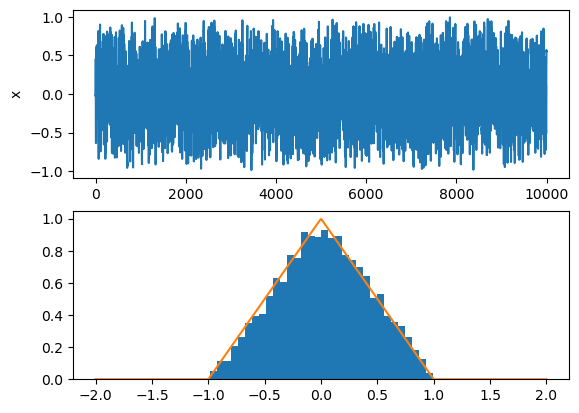

In [5]:
import matplotlib.pyplot as plt

print(f"Acceptance rate = {acceptance_rate}")

plt.subplot(211)
plt.plot(samples)
plt.ylabel("x")

plt.subplot(212)
plt.hist(samples, density=True, bins=32)
x = np.linspace(-2, 2, 500)
plt.plot(x, fprime(x), label="target norm")

## 2D example

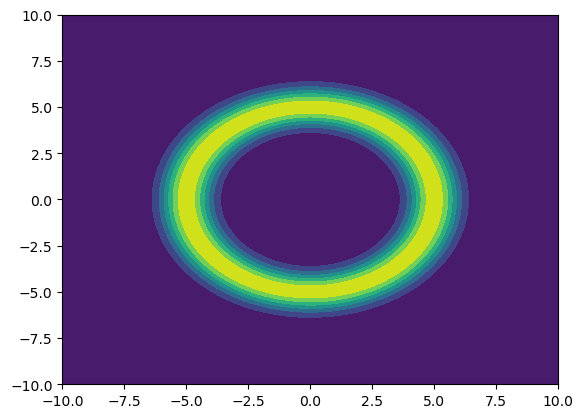

In [6]:
def fprime1(params):
    x, y = params
    u = np.sqrt(x*x + y*y)
    return np.exp(-(u-5)**2)

x, y = np.meshgrid(np.linspace(-10, 10, 5000), np.linspace(-10, 10, 5000))
z = fprime1((x, y))
plt.contourf(x, y, z)

In [11]:
def g1(x1, x):
    # Normal distribution with sigma=1/2
    return np.exp(-np.sum((x1-x)**2)/2/16) / np.sqrt(2*np.pi*16)

In [19]:
def sample1(x0, N):
    samples = []
    accepted = 0
    x = x0
    for i in range(N):
        x1 = np.random.randn(2) * 4 + x # Draw from g1(x1 | x)
        r = fprime1(x1) * g1(x, x1) / fprime1(x) / g1(x1, x)
        p = min(r, 1)
        if np.random.rand() < p:
            x = x1
            accepted += 1
        samples.append(x)
    return np.array(samples), accepted / N

In [24]:
samples, acceptance_rate = sample1((5.0, 0.0), 50000)

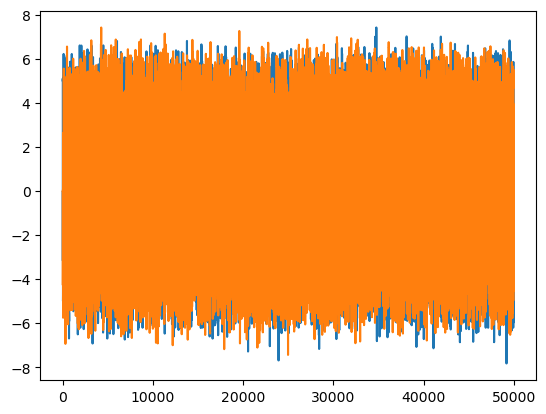

In [25]:
plt.plot(samples[:,0])
plt.plot(samples[:,1])

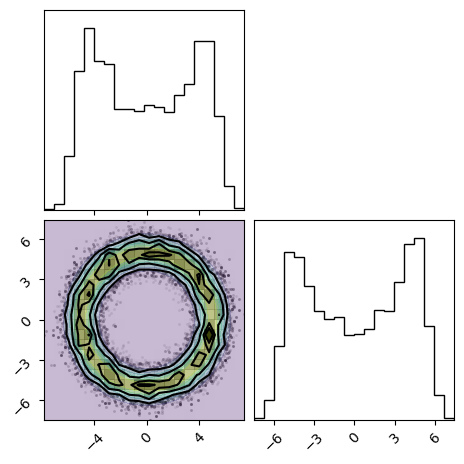

In [26]:
import corner

fig = corner.corner(samples)

plt.subplot(223)
plt.contourf(x, y, z, alpha=0.3)

In [27]:
acceptance_rate

0.24118